In [ ]:
#import necessaries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [ ]:
# MNIST dataset loaded for training and testing
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
# Normalize and Reshape the input data# Normalize the input data
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

# Convert the labels to one-hot encoding.One-hot encoding is a process of converting categorical data into a binary vector where only one element is set to 1, and all other elements are set to 0.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


(60000, 28, 28, 1)


/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


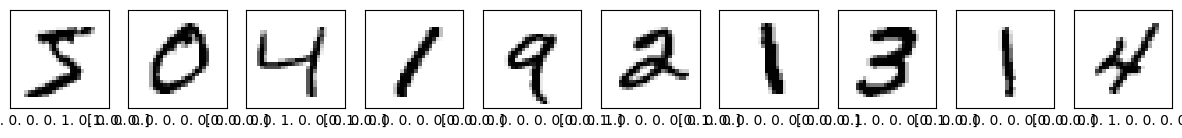

In [ ]:
# Show one image for each of the digits 0 to 9
fig = plt.figure(figsize=(15, 2))
print(x_train.shape)
for i, image in enumerate(x_train[:10]):
    # Create a new subplot for each image
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])


plt.show()

In [ ]:
# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Before Augmentation

model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.3449 - accuracy: 0.9006
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1283 - accuracy: 0.9625
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0896 - accuracy: 0.9735
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0685 - accuracy: 0.9793
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0530 - accuracy: 0.9838
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0416 - accuracy: 0.9873
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0351 - accuracy: 0.9893
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 9/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0255 - accuracy: 0.9916
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0218 - accuracy: 0.9928

In [ ]:
# Before Augmentation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(x_train.shape)

print('Test accuracy before augmentation:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0808 - accuracy: 0.9798
(60000, 28, 28, 1)
Test accuracy before augmentation: 0.9797999858856201


In [ ]:
# Augmentation parameter generated
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

In [ ]:
# Fit the train data with Augmentation
datagen.fit(x_train)
augmented_images = []
for batch in datagen.flow(x_train, batch_size=len(x_train), shuffle=False):
    augmented_images.append(batch)
    if len(augmented_images) * len(batch) >= len(x_train) * 2:
        break
augmented_images = np.concatenate(augmented_images)
y_train_augmented = np.concatenate((y_train, y_train), axis=0)




In [ ]:
# Fit the testing data with Augmentation
datagen.fit(x_test)
augmented_test_data = []
for batch in datagen.flow(x_test, batch_size=len(x_test), shuffle=False):
    augmented_test_data.append(batch)
    if len(augmented_test_data) * len(batch) >= len(x_test) * 2:
        break
augmented_test_data = np.concatenate(augmented_test_data)
y_test_augmented = np.concatenate((y_test, y_test), axis=0)

In [ ]:
b_test_acc = test_acc

In [ ]:
# After Augmentation

model.fit(augmented_images, y_train_augmented, epochs=100, batch_size=128)


Epoch 1/100
938/938 [==============================] - 4s 4ms/step - loss: 0.2585 - accuracy: 0.9230
Epoch 2/100
938/938 [==============================] - 4s 4ms/step - loss: 0.1370 - accuracy: 0.9576
Epoch 3/100
938/938 [==============================] - 5s 6ms/step - loss: 0.1063 - accuracy: 0.9669
Epoch 4/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0884 - accuracy: 0.9722
Epoch 5/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0746 - accuracy: 0.9761
Epoch 6/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0645 - accuracy: 0.9793
Epoch 7/100
938/938 [==============================] - 4s 5ms/step - loss: 0.0570 - accuracy: 0.9815
Epoch 8/100
938/938 [==============================] - 6s 6ms/step - loss: 0.0492 - accuracy: 0.9838
Epoch 9/100
938/938 [==============================] - 5s 5ms/step - loss: 0.0441 - accuracy: 0.9855
Epoch 10/100
938/938 [==============================] - 5s 6ms/step - loss: 0.0393 - accura

In [ ]:
# After Augmentation

test_loss, test_acc = model.evaluate(x_test, y_test)
print(augmented_images.shape)
print('Test accuracy after augmentation:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1687 - accuracy: 0.9812
(120000, 28, 28, 1)
Test accuracy after augmentation: 0.9811999797821045


In [ ]:
# Print Test accuracy after augmentation
print('Test accuracy after augmentation:', test_acc*100, "%")


Test accuracy after augmentation: 98.11999797821045 %


(120000, 28, 28, 1)


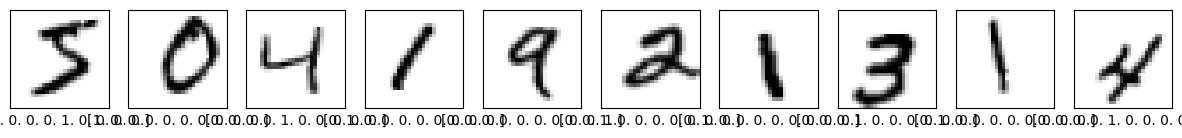

In [ ]:
# plot digit after training
fig = plt.figure(figsize=(15, 2))
print(augmented_images.shape)
for i, image in enumerate(augmented_images[:10]):
  
    # Create a new subplot for each image
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(y_train[i])


plt.show()